In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from rayopt import (system_from_text, Analysis, GeometricTrace,
                    FiniteConjugate, ParaxialTrace, system_from_yaml,
                    system_to_yaml, material)
np.set_printoptions(precision=5)

In [3]:
# Surface Radius   Thickness Material Diameter
lithograph_table = """
0       0.0000   0.1615   AIR      0.145
1       -0.79639 0.0418   Silica   0.189
2       -0.31776 0.0013   AIR      0.197
3       0.31768  0.0247   Silica   0.198
4       -0.90519 0.0014   AIR      0.198
5       -1.53140 0.0138   Silica   0.196
6       0.86996  0.1068   AIR      0.199
7       -0.96937 0.0138   Silica   0.171
8       0.30419  0.0567   AIR      0.169
9       -4.54831 0.0179   Silica   0.176
10      0.36328  0.0559   AIR      0.180
11      -0.13317 0.0179   Silica   0.185
12      0.83902  0.0148   AIR      0.240
13      0.0000   0.0581   Silica   0.273
14      -0.24698 0.0014   AIR      0.273
15      0.97362  0.0653   Silica   0.330
16      -0.34739 0.0176   AIR      0.330
17      1.12092  0.0447   Silica   0.342
18      -0.71734 0.0009   AIR      0.342
19      0.82256  0.0323   Silica   0.332
20      -1.18244 0.0009   AIR      0.332
21      0.31346  0.0345   Silica   0.300
22      1.42431  0.1071   AIR      0.296
23      -2.67307 0.0138   Silica   0.187
24      0.15590  0.0569   AIR      0.162
25      -0.21770 0.0171   Silica   0.154
26      1.01511  0.0839   AIR      0.154
27      -0.11720 0.0176   Silica   0.161
28      3.98510  0.0171   AIR      0.183
Stop
29      -0.40426 0.0339   Silica   0.193
30      -0.21818 0.0019   AIR      0.214
31      -7.96203 0.0650   Silica   0.246
32      -0.23180 0.0014   AIR      0.265
33      1.01215  0.0411   Silica   0.289
34      -0.50372 0.0008   AIR      0.289
35      0.40042  0.0441   Silica   0.287
36      3.75600  0.0014   AIR      0.281
37      0.24527  0.0429   Silica   0.267
38      0.49356  0.0013   AIR      0.267
39      0.17401  0.1101   Silica   0.233
40      0.11185  0.0832   AIR      0.139
41      0.07661  0.0263   Silica   0.082
42      0.18719  0.0227   AIR      0.065
43      0.0000   0.0000   AIR      0.036
"""

columns = "number roc distance material diameter"
s = system_from_text(lithograph_table, columns.split(), scale=25.4e-3*25.4,
        shifts={"distance": 1}, wavelengths=[248e-9],
        description=".56 NA lithography lens Sasaya, "
        "Ushida, and Mercado (1998), (Laikin/Lens Design)")
s.object = FiniteConjugate(radius=s[0].radius, na=.1, telecentric=True)
s.stop = 29
s.rescale()
s.update()
#s.reverse()

In [4]:
# https://docs.google.com/viewer?url=patentimages.storage.googleapis.com/pdfs/US5805344.pdf

data = """
0	107.954	vacuum
-617.88	30.375	1.5084
-207.0893	0.934	vacuum
201.9739	68.636	1.5084
-416.6217	0.865	vacuum
460.0439	7.061	1.5084
179.6999	15.608	vacuum
-373.0162	6.952	1.5084
249.496	30.983	vacuum
-2591.2236	11.541	1.5084
229.2357	33.165	vacuum
-82.3025	11.524	1.5084
569.8191	9.159	vacuum
5523.6251	36.703	1.5084
-156.82	0.889	vacuum
610.3354	41.168	1.5084
-221.8862	0.883	vacuum
528.5938	26.903	1.5084
-570.2004	0.883	vacuum
423.5775	21.883	1.5084
-1396.2999	0.883	vacuum
203.9075	22.715	1.5084
835.4548	67.972	vacuum
-735.899	8.386	1.5084
104.6386	23.616	vacuum
-184.6683	11.034	1.5084
288.7053	58.171	vacuum
-74.5663	11.343	1.5084
2318.9745	11.371	vacuum
-283.4504	22.211	1.5084
-142.5176	1.323	vacuum
-5670.469	39.484	1.5084
-146.6908	0.883	vacuum
654.7531	37.168	1.5084
-347.7071	0.883	vacuum
254.9142	31.6	1.5084
2133.198	0.883	vacuum
164.8042	27.885	1.5084
349.3775	0.884	vacuum
108.9816	73.045	1.5084
75.6698	54.069	vacuum
46.2841	16.956	1.5084
99.3161	13.169	vacuum
0	0	vacuum
"""

columns = "roc distance material"
s = system_from_text(data, columns.split(),
        shifts={"distance": 1}, wavelengths=[248e-9],
        description=".56 NA lithography lens Sasaya, "
        "Ushida, and Mercado (1998), (US5805344)")
s.object = FiniteConjugate(radius=11.7/.25,
                           telecentric=True)
s[0].radius = s.object.radius
s.stop = 30
s[s.stop].radius = 74.
s.update()
p = ParaxialTrace(s)
p.update_conjugates()
p.resize()
s.update()

In [5]:
print(s)

System: .56 NA lithography lens Sasaya, Ushida, and Mercado (1998), (US5805344)
Scale: 1.0 mm
Wavelengths: 248 nm
Object:
 Index: 1
 Entrance: 123 dia at 108
 Pupil: 2.85e+03 dia at 1.01e+04
 Radius: 46.8
 NA: 0.14
 Telecentric: True
Image:
 Index: 1
 Entrance: 38.3 dia at 13.2
 Pupil: 4.1e+03 dia at 3.61e+03
 Radius: 11.7
 NA: 0.493
Stop: 30
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf       93.6      basic/vacuum   1.000     nan     nan
 1 S     107.95     -617.9     123.22                 -   1.508     nan     nan
 2 S     30.375     -207.1     130.79      basic/vacuum   1.000     nan     nan
 3 S      0.934        202     130.84                 -   1.508     nan     nan
 4 S     68.636     -416.6     118.34      basic/vacuum   1.000     nan     nan
 5 S      0.865        460     117.98                 -   1.508     nan     nan
 6 S      7.061      179.7     115.41      basic/vacuum   1.000     nan     nan
 7 S 

(10053.641841589117, array([[-1521.46179, -1477.86562],
       [ 1521.46179,  1577.41139]]))


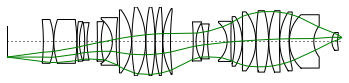

In [6]:
#l.get("glass", "")
s[1].refractive_index(s.wavelengths[0])

s.update()
print(s.pupil((0, 1.), stop=None, l=None))

g = GeometricTrace(s)
#g.rays_point((0, 0), nrays=3, distribution="meridional")
g.rays_clipping((0, 1))
#.rays_paraxial(ParaxialTrace(s))
fig, ax = plt.subplots()
s.plot(ax)
g.plot(ax)

/home/rj/work/nist/pyrayopt/rayopt/elements.py:196: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:408: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h


System: .56 NA lithography lens Sasaya, Ushida, and Mercado (1998), (US5805344)
Scale: 1.0 mm
Wavelengths: 248 nm
Object:
 Index: 1
 Entrance: 123 dia at 108
 Pupil: 2.85e+03 dia at 1.01e+04
 Radius: 46.8
 NA: 0.14
 Telecentric: True
Image:
 Index: 1
 Entrance: 38.3 dia at 13.2
 Pupil: 4.1e+03 dia at 3.61e+03
 Radius: 11.7
 NA: 0.493
Stop: 30
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf       93.6      basic/vacuum   1.000     nan     nan
 1 S     107.95     -617.9     123.22                 -   1.508     nan     nan
 2 S     30.375     -207.1     130.79      basic/vacuum   1.000     nan     nan
 3 S      0.934        202     130.84                 -   1.508     nan     nan
 4 S     68.636     -416.6     118.34      basic/vacuum   1.000     nan     nan
 5 S      0.865        460     117.98                 -   1.508     nan     nan
 6 S      7.061      179.7     115.41      basic/vacuum   1.000     nan     nan
 7 S 

/home/rj/work/nist/pyrayopt/rayopt/analysis.py:424: RuntimeWarning: invalid value encountered in true_divide
  z = -t.y[-1, :, 1]/tanarcsin(t.i[-1])[:, 1]


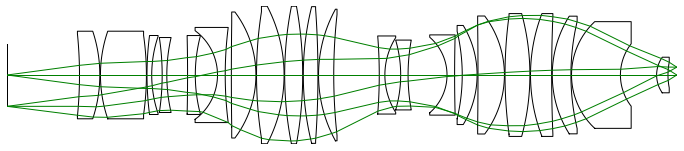

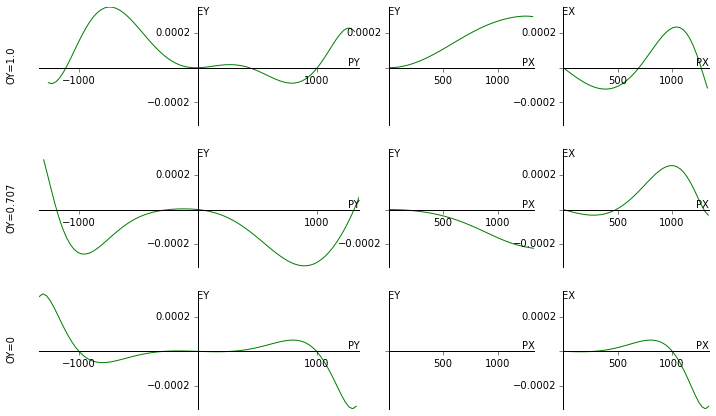

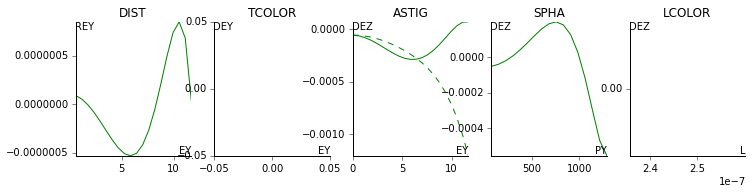

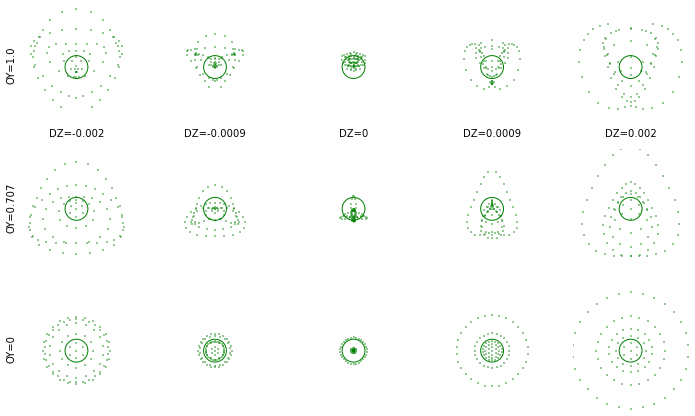

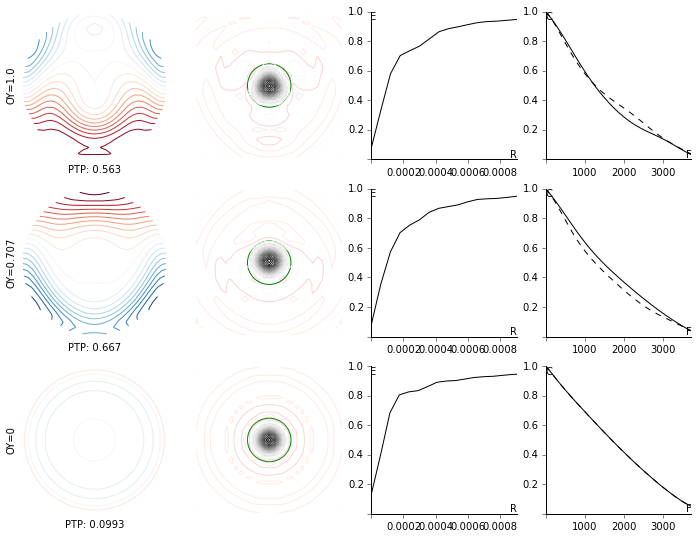

In [7]:
a = Analysis(s, refocus_full=True)

[  1.07954000e+02  -1.61843724e-03   3.03750000e+01  -4.82883471e-03
   9.34000000e-01   4.95113478e-03   6.86360000e+01  -2.40025904e-03
   8.65000000e-01   2.17370560e-03   7.06100000e+00   5.56483337e-03
   1.56080000e+01  -2.68084871e-03   6.95200000e+00   4.00808029e-03
   3.09830000e+01  -3.85918066e-04   1.15410000e+01   4.36232227e-03
   3.31650000e+01  -1.21502992e-02   1.15240000e+01   1.75494293e-03
   9.15900000e+00   1.81040527e-04   3.67030000e+01  -6.37673766e-03
   8.89000000e-01   1.63844339e-03   4.11680000e+01  -4.50681475e-03
   8.83000000e-01   1.89181182e-03   2.69030000e+01  -1.75376938e-03
   8.83000000e-01   2.36084306e-03   2.18830000e+01  -7.16178523e-04
   8.83000000e-01   4.90418450e-03   2.27150000e+01   1.19695285e-03
   6.79720000e+01  -1.35888213e-03   8.38600000e+00   9.55670278e-03
   2.36160000e+01  -5.41511456e-03   1.10340000e+01   3.46373967e-03
   5.81710000e+01  -1.34108840e-02   1.13430000e+01   4.31225095e-04
   1.13710000e+01  -3.52795410e-03

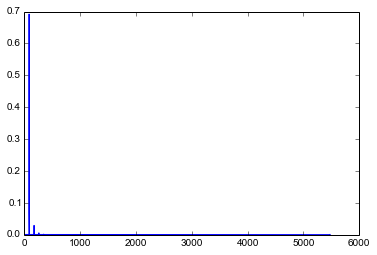

In [61]:
from scipy import optimize
import asa

var = []
val = []
valmax = []
valmin = []
for i in range(1, len(s) - 2):
    var.extend([(i, "distance"), (i, "curvature")])
    val.extend([s.get_path(_) for _ in var[-2:]])
    valmin.extend([max(1e-3, val[-2] - .5), val[-1] - 5e-5])
    valmax.extend([val[-2] + .5, val[-1] + 5e-5])

p0 = np.array(val)
print p0

valmin = np.array(valmin)
valmax = np.array(valmax)
pscale = valmax - valmin
#print pscale

assert np.all(pscale > 0)
assert np.all(valmax > p0)
assert np.all(valmin < p0)

def update(p):
    for v, q in zip(var, p):
        s.set_path(v, float(q))

g = []
for h in 0, .7, 1.:
    gi = GeometricTrace(s)
    gi.rays_point((0, h), distribution="radau", nrays=22,
                  filter=False, clip=False)
    g.append(gi)

path = []
def merit(p):
    update(p*pscale)
    #if not s.edge_thickness() > 0:
    #    raise asa.CostParameterError
    #s.update()
    [gi.propagate() for gi in g]
    r = sum(gi.rms() for gi in g)
    if np.isnan(r):
        #print "fail", p, r
        raise asa.CostParameterError
    #print p, r
    path.append(r)
    return r

print merit(p0/pscale)

try:
    p = optimize.minimize(merit, p0/pscale, method="SLSQP", tol=1e-7,
                          bounds=zip(valmin/pscale, valmax/pscale))
    #r = asa.asa( merit, p0/pscale, valmin/pscale, valmax/pscale,
    #            full_output=True, limit_generated=100,
    #            limit_acceptances=10)
    #print r
    #print asa.asa_codes[r[2]]
finally:
    merit(p0/pscale)
    
plt.plot(path)

(0, 0.001)

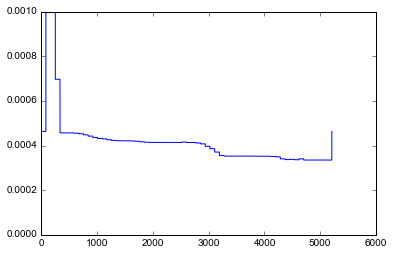

In [47]:
plt.plot(path)
plt.ylim(0, .001)

(0, 0.001)

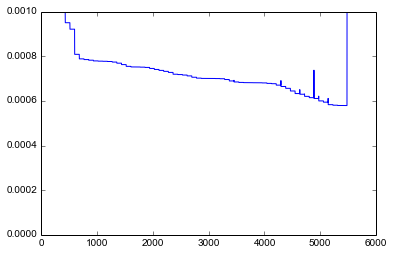

In [62]:
plt.plot(path)
plt.ylim(0, .001)

In [63]:
print p.x*pscale - p0
merit(p.x)
print s
#print system_to_yaml(s)
#merit(p0/pscale)

[  1.87233238e-02  -8.83049577e-06   3.50448931e-02  -5.94900580e-06
  -6.60420374e-02   1.10389944e-05  -7.49300118e-02   4.10389023e-06
  -1.07305414e-01  -3.35707345e-06  -7.75994532e-02  -3.66721451e-06
  -1.42467444e-01  -1.86792307e-06  -8.07214150e-02  -3.72255257e-06
  -9.31900831e-02  -3.59861334e-06  -6.48860697e-02  -1.63659185e-05
   4.28382062e-02  -3.25872144e-05  -2.68664968e-02   6.25795945e-07
  -1.55303733e-01  -1.02464434e-05   7.83799029e-04   1.01298789e-05
  -2.93769192e-02   5.32718381e-06  -3.50551700e-02   5.77433365e-06
  -6.28560655e-02   1.22920142e-05  -5.23589182e-02  -1.19824120e-05
  -7.47142353e-02   8.27748927e-06  -4.27149306e-02  -1.50384355e-05
  -4.95661527e-02   2.68787748e-06   7.70724482e-03  -1.15984609e-05
  -2.50229349e-02   5.47607010e-06  -5.22277921e-02  -5.51934572e-06
  -6.47269422e-02   9.42985137e-07  -1.14023958e-01  -1.83649664e-05
   3.26499932e-03   1.31477082e-05   7.40118374e-02  -5.00000000e-05
  -3.36279791e-01  -2.23858660e-05

In [54]:
p

  status: 0
 success: True
    njev: 41
    nfev: 3457
     fun: 0.00033871264573987424
       x: array([ 107.97029232,  -16.19353204,   30.39420665,  -48.30113857,
          0.9339493 ,   49.49782862,   68.63085772,  -24.01758134,
          0.85467672,   21.74704929,    7.05602851,   55.65850218,
         15.60038803,  -26.78017997,    6.95099837,   40.09248531,
         30.99259197,   -3.80370601,   11.549283  ,   43.63505988,
         33.19993943, -121.56762543,   11.54744571,   17.4388284 ,
          8.8697162 ,    1.74989762,   36.73179648,  -63.77820973,
          0.89300205,   16.41591505,   41.17418074,  -45.1213454 ,
          0.87780647,   19.00046995,   26.90059036,  -17.62478518,
          0.88248396,   23.71890817,   21.89213953,   -7.23401653,
          0.89850608,   49.13939694,   22.76223936,   11.94616361,
         68.02510219,  -13.59857342,    8.42233804,   95.56996598,
         23.61724531,  -54.18783247,   11.02498266,   34.63284223,
         58.15237254, -134.1073